In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [6]:
%matplotlib inline

In [8]:
features, target = load_wine(return_X_y=True) #三分类的葡萄酒数据集
features.shape, target.shape

((178, 13), (178,))

In [10]:
RANDOM_STATE = 42
# 将数据切分成7:3分别作为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30,random_state=RANDOM_STATE)

In [11]:
#不是用PCA
raw_clf = make_pipeline(StandardScaler(), LogisticRegression())
raw_clf.fit(X_train, y_train)
pred_test_raw = raw_clf.predict(X_test)

In [13]:
# 使用PCA但不做数据预处理
unscaled_clf = make_pipeline(PCA(n_components=2), LogisticRegression())#使用2个主成分因子
unscaled_clf.fit(X_train, y_train)
pred_test_unscaled = unscaled_clf.predict(X_test)

In [ ]:
PCA

In [14]:
# 使用PCA，同时做数据预处理
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), LogisticRegression())#使用2个主成分因子
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [18]:
# 查看各种情况下的分类准确率
print(u'\n不是用PCA，预测准确率：{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_raw)))
print(u'\n使用PCA但无数据预处理，预测准确率：{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_unscaled)))
print(u'\n使用PCA且数据预处理，预测准确率：{:.2%}'.format(metrics.accuracy_score(y_test, pred_test_std)))


不是用PCA，预测准确率：98.15%

使用PCA但无数据预处理，预测准确率：74.07%

使用PCA且数据预处理，预测准确率：98.15%


In [19]:
# 将PCA信息抽取出来
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [20]:
# 打印最主要的主成分，注意，它是特征空间中的主成分轴，表达了数据中具有最大方差的方向  (仍然是特征空间上的坐标向量)
print(u'\n未预处理第一主成分：\n{0}'.format(pca.components_[0]))
print(u'\n预处理第一主成分：\n{0}'.format(pca_std.components_[0]))

#告诉你预处理的重要性！！


未预处理第一主成分：
[  1.76342917e-03  -8.35544737e-04   1.54623496e-04  -5.31136096e-03
   2.01663336e-02   1.02440667e-03   1.53155502e-03  -1.11663562e-04
   6.31071580e-04   2.32645551e-03   1.53606718e-04   7.43176482e-04
   9.99775716e-01]

预处理第一主成分：
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


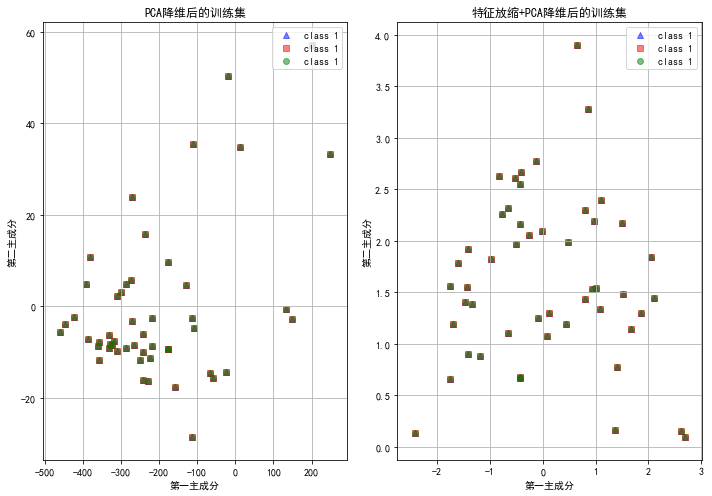

In [27]:
# 对训练数据进行PCA降维以画图
X_train_nostd = pca.transform(X_train)
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

FIG_SIZE = (10, 7)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

#未预处理的PCA
for l, c, m in zip(range(0, 3),('blue','red', 'green'),('^','s','o')):
    ax1.scatter(X_train_nostd[y_train == 1, 0],X_train_nostd[y_train == 1, 1],
                color = c,
                label='class %s'%1,
                alpha=0.5,
                marker=m
               )
    
# 预处理后的PCA
for l, c, m in zip(range(0, 3),('blue','red', 'green'),('^','s','o')):
    ax2.scatter(X_train_std[y_train == 1, 0],X_train_std[y_train == 1, 1],
                color = c,
                label='class %s'%1,
                alpha=0.5,
                marker=m
               )

ax1.set_title(u'PCA降维后的训练集')
ax2.set_title(u'特征放缩+PCA降维后的训练集')

for ax in (ax1, ax2):
    ax.set_xlabel(u'第一主成分')
    ax.set_ylabel(u'第二主成分')
    ax.legend(loc='upper right')
    ax.grid()
    
plt.tight_layout()